In [15]:
from typing import Iterable, List

import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

from data.data_helpers import get_unique_letters, get_cumulative_cell_counts, \
    get_original_data, get_weighted_mean_df, get_region_counts_df

In [16]:
def apply_style(style: str = "seaborn-bright") -> None:
    plt.style.use(style)


def generate_heatmap_data(sequences: Iterable[str], ) -> np.ndarray:
    data = np.zeros((len(get_unique_letters(sequences)), len(sequences[0])))
    unique_letters = list(get_unique_letters(sequences))

    for sequence in sequences:
        for index, char in enumerate(sequence):
            data[unique_letters.index(char)][index] += 1

    return data

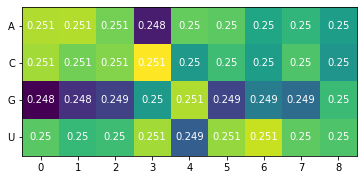

In [17]:
sequences = get_original_data()["SeqID"]
data = normalize(generate_heatmap_data(sequences), axis=0, norm='l1')

fig, ax = plt.subplots()
im = ax.imshow(data, )

ax.set_xticks(np.arange(np.shape(data)[1]), np.arange(np.shape(data)[1]))
ax.set_yticks(np.arange(np.shape(data)[0]), get_unique_letters(sequences))

# Loop over data dimensions and create text annotations.
for i in range(np.shape(data)[0]):
    for j in range(np.shape(data)[1]):
        text = ax.text(j, i, round(data[i, j], 3),
                       ha="center", va="center", color="w")
plt.show()

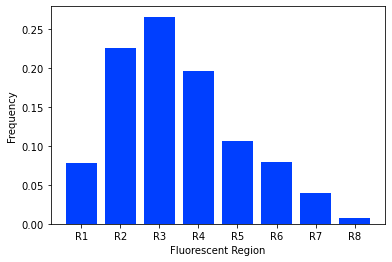

In [18]:
x = range(1, 9)
counts = [count / sum(get_cumulative_cell_counts())
          for count in get_cumulative_cell_counts()]

apply_style()
plt.bar(x, counts)
plt.ylabel("Frequency")
plt.xlabel("Fluorescent Region")
plt.xticks(x, [f"R{_}" for _ in x])
plt.show()

In [19]:
def plot_dG_feature(feature: str = "pairing",) -> None:
    valid_features = ["pairing", "folding"]
    if feature.lower() not in valid_features:
        raise ValueError(f"Not a valid argument select from {valid_features}")

    df = get_weighted_mean_df()

    apply_style()
    hb = plt.hexbin(df[f"dG_{feature}"], df["weighted_mean"], gridsize=50, bins='log', cmap='inferno')
    cb = plt.colorbar(hb, ax=plt.gca())
    cb.set_label('log10(counts)')

    plt.ylabel(f"Weighted Mean")
    plt.xlabel(f"dG_{feature}")
    plt.show()


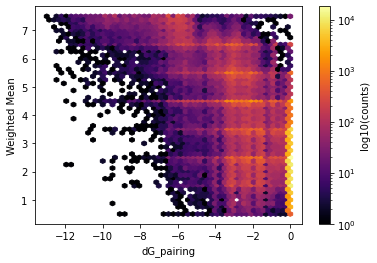

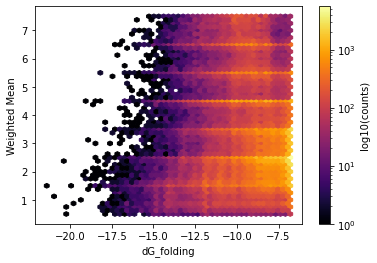

In [20]:
plot_dG_feature("pairing")
plot_dG_feature("folding")

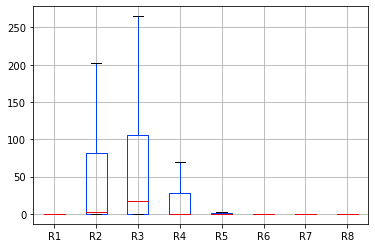

In [21]:
df = get_region_counts_df()
df.boxplot(showfliers=False)
plt.show()